In [127]:
# install your library

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import graphviz as gr
import random

In [128]:
path = "C:/Users/zjy97/Downloads/python-causality-handbook-v1.0/matheusfacure-python-causality-handbook-f666303/causal-inference-for-the-brave-and-true/data/"

In [176]:
# 1. what is did? difference-in-difference

# let's say we have a period before and after the intervention and you wish to untangle the impact of the intervention from a general trend

# the case

data = pd.read_csv(path+"billboard_impact.csv")
# POA is a dummy indicator for the city of Porto Alegra
# Jul is a dummy for the month of July

poa_before = data.query("poa==1 & jul==0")["deposits"].mean()

poa_after = data.query("poa==1 & jul==1")["deposits"].mean()

poa_after - poa_before #41.04775

41.04775

In [177]:
fl_after = data.query("poa==0 & jul==1")["deposits"].mean()
fl_before = data.query("poa==0 & jul==0")["deposits"].mean()

diff_in_diff = (poa_after-poa_before)-(fl_after-fl_before)
diff_in_diff # diff_in_diff telling us that we should expect deposits to increase by R$6.52 per customer
# did assumes that the growth pattern between the 2 cities are the same, but it doesnt require them to have to same based level 

6.524557692307688

In [ ]:
# 2. why we cannot directly use poa_after - poa_before
# this is because time is a variable, we cannot assume the growth from time is uniform or no growth

# 3. why we cannot use pad_afer - fl_after
# this for sure solves the confounding from time, but the city's difference is ignored

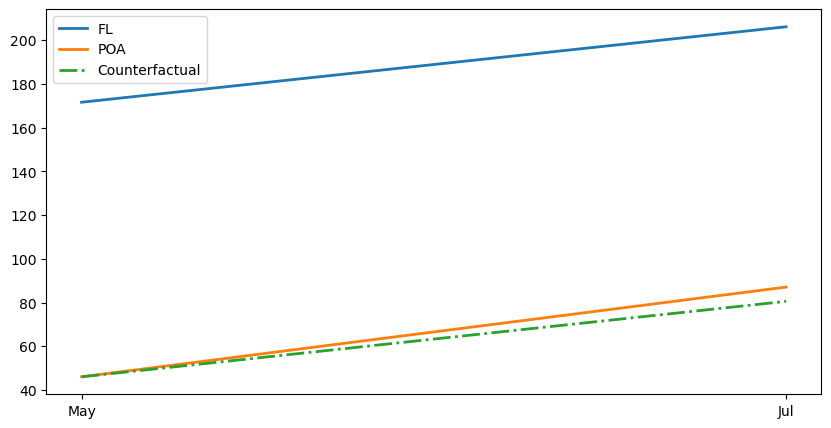

In [178]:
# 4. to visualize the did
plt.figure(figsize=(10,5))
plt.plot(["May", "Jul"], [fl_before, fl_after], label="FL", lw=2)
plt.plot(["May", "Jul"], [poa_before, poa_after], label="POA", lw=2)

plt.plot(["May", "Jul"], [poa_before, poa_before+(fl_after-fl_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend();

In [179]:
# 5. how much we can trust did
# run a ols to test it
smf.ols('deposits ~ poa*jul', data=data).fit().summary().tables[1]# get exactly same ate poa:jul==6.5246

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,171.6423,2.363,72.625,0.000,167.009,176.276
poa,-125.6263,4.484,-28.015,0.000,-134.418,-116.835
jul,34.5232,3.036,11.372,0.000,28.571,40.475
poa:jul,6.5246,5.729,1.139,0.255,-4.706,17.755


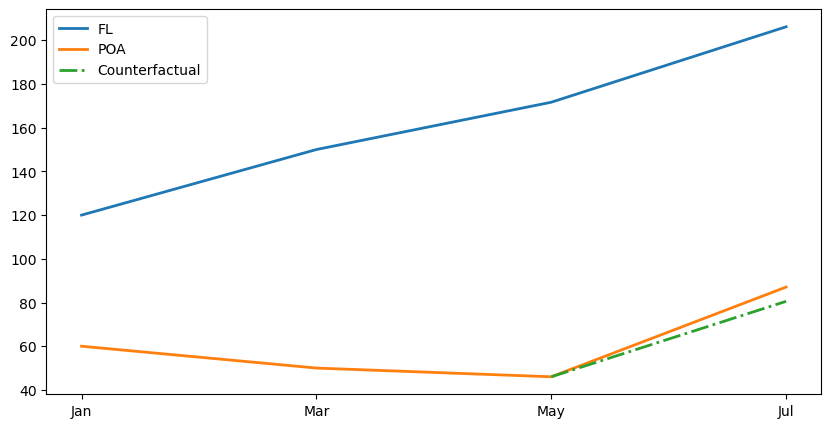

In [180]:
# 6. non parallel trends
# the assumption of did is that we think the trend is parallel
# if the growth trend from the treated and uncontreat are differet, the did will be biased

# for example:
plt.figure(figsize=(10,5))
x = ["Jan", "Mar", "May", "Jul"]

plt.plot(x, [120, 150, fl_before,  fl_after], label="FL", lw=2)
plt.plot(x, [60, 50, poa_before, poa_after], label="POA", lw=2)

plt.plot(["May", "Jul"], [poa_before, poa_before+(fl_after-fl_before)], label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend();